## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [64]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [113]:
#Code below reads the csv file and stored it in dataset(df)
df = pd.read_csv('ab_data.csv')
#Shows first five rows of df
df.head()


user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the below cell to find the number of rows in the dataset.

In [66]:
#Code below shows there are 294478 rows and 5 columns in dataset
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [67]:
 # Code below shows number of unique values in column user_id
df.user_id.nunique()

290584

d. The proportion of users converted.

In [68]:
#Block below calculates proportion of users converted
(len(df[df['converted']== 1]))/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [69]:
# Code below calculates the number of rows that new_page and treatment don't line up.
(len(df.query("landing_page == 'old_page' & group == 'treatment'"))) + (len(df.query("landing_page == 'new_page' & group == 'control'")))

3893

f. Do any of the rows have missing values?

In [70]:
#Code below checks wheather any row have missing values.
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [71]:
# Uses query function to extract data on the basis of group and landing_page.
#Create two dfs new and old, by doing this we can remove rows that is not aligned correct group and landing_page.
new = df.query("group == 'treatment' and landing_page == 'new_page'")
old= df.query("group == 'control' and landing_page == 'old_page'")
#Then append new and old and create new dataset(df2)
df2 = new.append(old)

In [72]:
#df2 contains 290585 rows and 5 coulmns.
df2.shape

(290585, 5)

In [73]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [74]:
# Code below checks number of unique rows in df2.
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [75]:
#Code below gives the user_id that is repeated in df2.
df2[df2.duplicated(['user_id'], keep=False)]

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

c. What is the row information for the repeat **user_id**? 

In [76]:
#This block gives the information of repeated user_id.
df2[df2.duplicated(['user_id'], keep=False)]

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [77]:
# The code below will drop one of the duplicate row and keep the other one.
df2 = df2.drop_duplicates(subset='user_id', keep ='last')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [78]:
#The code below gives the probability of individual converting regardlessof the page.
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [79]:
#This block gives probability of control group converted.
df2[df2['group']== 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [80]:
#This block gives probability of treatment group converted.
df2[df2['group']== 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [81]:
#Code below calculates the probability of individuals who receive new page.
df2[df2['landing_page']=='new_page'].shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No there is not sufficient information to say the new page has more conversions,only by having the probabilities..**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H0:Pnew - Pold ≦ 0$$
$$H1:Pnew - Pold > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [82]:
#Code below is to create a new_df only for the new_page.
new_df = df2.query('landing_page == "new_page"')
#Then calulate the mean of people who converted while receiving new page.
convert_rate_new = new_df['converted'].mean()
#converted  mean of new page
convert_rate_new


0.11880806551510564

In [83]:
#code below calculates Pnew under null from entire data,without considering the categories.
Pnew_null = df2.converted.mean()
Pnew_null


0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [84]:
#Code below is to create a old_df only for the old_page.
old_df = df2.query('landing_page == "old_page"')
#Then calulate the mean of people who converted while receiving old page.
convert_rate_old = old_df['converted'].mean()
# converted mean of old page
convert_rate_old

0.1203863045004612

In [85]:
#code below calculates Pold under null from entire data,without considering different categories.
Pold_null = df2.converted.mean()
Pold_null

0.11959708724499628

c. What is $n_{new}$?

In [86]:
#Code below calculates number of rows are there with new_page in dataset.
n_new = (len(df2[df2['landing_page']== 'new_page']))
n_new

145310

d. What is $n_{old}$?

In [87]:
#Code below calculates number of rows are there with old_page in column dataset.
n_old = (len(df2[df2['landing_page']== 'old_page']))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [88]:
#code below uses random binomial function to simulate n_new transactions with a convert rate of Pnew under the null
#stored it to new_page_converted.
new_page_converted = np.random.binomial(1, Pnew_null, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [89]:
#code below uses random binomial function to simulate n_old transactions with a convert rate of Pold under the null
#stored it to old_page_converted.
old_page_converted = np.random.binomial(1, Pold_null, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [90]:
#This block calculates the difference between Pnew and Pold and we get the answer zero. 
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_old - p_new


0.00044269976603539263

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [91]:
# we can use this block also to simulate the 10000Pnew - Pold, but it takes lot more time..so am putting it 
#here as a reference.


#The code below simulates 10000 Pnew - Pold values using bootsamp technique and by using respective number of pages
#samples.
#Pnew_means,Pold_means,p_diffs = [],[],[]

#for _ in range(10000): 
    #new_bootsample=df2.sample(n_new, replace=True) 
    #Pnew = new_bootsample['converted'].mean()
    
    #old_bootsample=df2.sample(n_old, replace=True)
    ##Pold = old_bootsample['converted'].mean()
# append the info 
    #Pnew_means.append(Pnew)
    ##Pold_means.append(Pold)
    #p_diffs.append(Pnew - Pold)
    
    


In [92]:
#The code below simulates 10000 Pnew - Pold values using bootsamp technique and by using respective number of pages
#samples.
p_diffs = np.random.binomial(n_new, Pnew_null, 10000)/n_new - np.random.binomial(n_old, Pold_null, 10000)/n_old


In [93]:
np.std(p_diffs) # the standard deviation of the sampling distribution for difference in means

0.0012132120319357145

In [94]:
#code below calculates the mean of null.
null_mean = df2.converted.mean()
null_mean

0.11959708724499628

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

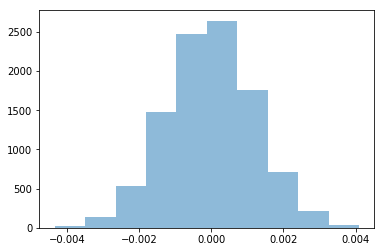

In [95]:
#code below plots the p_diffs.
plt.hist(p_diffs, alpha = 0.5);# looks normal - this is by the central limit theorem

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [96]:
#code below calculates the p_value from the observed difference.
obs_diff = df2.query("group == 'treatment'")["converted"].mean() - df2.query("group == 'control'")["converted"].mean()
(p_diffs > obs_diff).mean()

0.902

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**we just calculated the p_value here and it is 0.9054 and it is greater than Type1 error rate threshold of 0.5. So we have evidence that our statistic is likely from null. Because of that we are unable to drop null hypothesis and failed to reject it.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [97]:
import statsmodels.api as sm
#Number of convertions of old page.
convert_old = print("convert_old = " + (str(len(df2.query("landing_page == 'old_page' & converted == '1'")))))

#Number of convertions of new page.
convert_new = print("convert_new = " + (str(len(df2.query("landing_page == 'new_page' & converted == '1'")))))

#Number of old page.
n_old = print("n_old = " + (str(len(df2[df2['landing_page']== 'old_page']))))

#Number of new page.
n_new = print("n_new = " + (str(len(df2[df2['landing_page']== 'new_page']))))


convert_old = 17489
convert_new = 17264
n_old = 145274
n_new = 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [98]:
#code below uses stats model ztest to calculate z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([17489, 17264], [145274, 145310],alternative = 'smaller')

z_score,p_value

(1.3109241984234394, 0.9050583127590245)

In [99]:
from scipy.stats import norm

norm.cdf(z_score),norm.ppf(1-(0.05/2))

(0.9050583127590245, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Here the z_score of 1.3109241984234394 does not exceed the critical value of 1.959963984540054. So we unable to reject the null hypothesis. 
So we conclude that  old_page(17489/145274) is statistically different and better than new_page(17264/145310).
This is the same conclusion we made with the simulation in parts j and k. **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression is the type of regression we are going to perform in this case because we are predicting using only two outcomes conversion or no conversion**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [100]:
#Shows first five rows of df2
df2.head()


user_id                   timestamp      group landing_page  converted
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
6   679687  2017-01-19 03:26:46.940749  treatment     new_page          1
8   817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9   839785  2017-01-15 18:11:06.610965  treatment     new_page          1

In [101]:
#code below creates dummy variables for land_page and group.
df2[['new_page','old_page']] = pd.get_dummies(df2['landing_page'])
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

In [102]:
#Shows first five rows of df2 after adding dummy varaiable columns.
df2.head(10)

user_id                   timestamp      group landing_page  converted  \
2    661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3    853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
6    679687  2017-01-19 03:26:46.940749  treatment     new_page          1   
8    817355  2017-01-04 17:58:08.979471  treatment     new_page          1   
9    839785  2017-01-15 18:11:06.610965  treatment     new_page          1   
10   929503  2017-01-18 05:37:11.527370  treatment     new_page          0   
11   834487  2017-01-21 22:37:47.774891  treatment     new_page          0   
12   803683  2017-01-09 06:05:16.222706  treatment     new_page          0   
13   944475  2017-01-22 01:31:09.573836  treatment     new_page          0   
14   718956  2017-01-22 11:45:11.327945  treatment     new_page          0   

    new_page  old_page  control  treatment  
2          1         0        0          1  
3          1         0        0          1  
6          1         0        0          1  
8          1         0        0          1  
9          1         0        0          1  
10         1         0        0          1  
11         1         0        0          1  
12         1         0        0          1  
13         1         0        0          1  
14         1         0        0          1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [103]:
#add intercept
df2['intercept'] = 1
#use statsmodel function to predict conversion based on which page the customer receives.
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'new_page']])
#code below fits the model.
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [104]:
#Shows the summary of the model.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        12:45:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
new_page      -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [105]:
#code below exponentiate the coefficents.
np.exp(-0.0150)

0.9851119396030626

In [106]:
#we receive a multiplicative change of less than 1 for new page so we obtain the reciprocal.
1/np.exp(-0.0150)

1.015113064615719

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p_vlue associated with ab_page is 0.190 and it is different from p_value calculated in part 2 because it is showing new_page is statitically not significant to predict the response **

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is really good to add other factors to add into regression model because it shows us which varibale is statistically more significant to predict the response.No there is no disadvantage of adding additional terms into the regression model**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [107]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [108]:
#Shows first five rows of df_new after joining the country dataset.
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  new_page  old_page  control  treatment  intercept  
user_id                                                                
834778           0         0         1        1          0          1  
928468           0         1         0        0          1          1  
822059           1         1         0        0          1          1  
711597           0         0         1        1          0          1  
710616           0         1         0        0          1          1

In [109]:
#code below check the value counts of column country.
df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [110]:
### Create the necessary dummy variables for the countries.
df_new[['CA', 'UK','US']] = pd.get_dummies(df_new['country'])

In [111]:
#add intercept
df_new['intercept'] = 1
#use statsmodel function to predict conversion based on from which country the customer is from.
log_mod_country = sm.Logit(df_new['converted'], df_new[['intercept', 'UK','US']])
#code below fits the model.
results = log_mod_country.fit()
#Shows the summary of the model.
results.summary()



Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 05 Nov 2018   Pseudo R-squ.:               1.521e-05
Time:                        12:46:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [112]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
#use statsmodel function to predict conversion based on which page the customer receives,and the country were are 
#they from.
logit_mod_all = sm.Logit(df_new['converted'], df_new[['intercept','new_page', 'US', 'UK']])
results = logit_mod_all.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        12:46:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

**Here the result shows none of the explanatory variables are not statistically significant to predict the response variable of converted,because of higher p_value.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.